## PART 1- Ford GoBike system Data Exploration
## by Fatima Brazao

Preliminary Wrangling

This document explores a dataset from a bike sharing system with attributes from 183 412 individual rides. The attributes are the duration(in seconds), the start and end date and time, as well as start and end location by station id and name, and by longitude and latitude. Besides time and location, there is data about the user_type(costumer or subscriber), member birth year and gender, and finally if the bike-share was for all the trip.

In [35]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [36]:
df=pd.read_csv("201902-fordgobike-tripdata.csv")

df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [37]:
df.shape

(183412, 16)

In [38]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [40]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [41]:
#checking for the columns with null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [42]:
# remove all the nan from the dataset
df=df.dropna()
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [43]:
#member_birth_year change type from float to int
df['member_birth_year']=df['member_birth_year'].astype(int)

In [44]:
#Remove column bike_share_for_all_trip
df.drop('bike_share_for_all_trip', axis=1, inplace=True)

In [45]:
#Remove latitude
df.drop('start_station_latitude', axis=1, inplace=True)
df.drop('end_station_latitude', axis=1, inplace=True)


In [46]:
#Remove longitude
df.drop('start_station_longitude', axis=1, inplace=True)
df.drop('end_station_longitude', axis=1, inplace=True)


In [47]:
# change start station id from float to int data type
df['start_station_id']=df['start_station_id'].astype(int)

In [48]:
# change end station id from float to int data type
df['end_station_id']=df['end_station_id'].astype(int)

In [49]:
# frequency of birth years of the members
df['member_birth_year'].value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
1992     8245
1987     8010
1986     7953
1994     7654
1995     7420
1985     7023
1984     6557
1983     5953
1980     5011
1982     4987
1996     4637
1981     4344
1979     3756
1997     3476
1998     3208
1978     2830
1977     2706
1974     2633
1999     2504
1975     2503
1976     2435
1973     2080
1968     1927
1971     1924
1972     1909
        ...  
1954      301
1952      189
1951      180
1950      178
1953      158
1947      135
1955      134
1945      105
1949       99
1931       89
1900       53
1948       51
2001       34
1943       30
1942       21
1933       20
1946       19
1939       11
1902       11
1941        9
1901        6
1938        3
1920        3
1934        2
1944        2
1878        1
1930        1
1928        1
1927        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

### What is the structure of your dataset?

The Dataset refers to observations of individual bike rides made in a bike sharing system. Dataset variables the duration(in seconds), the start and end date and time, as well as start and end location by station id and name, and by longitude and latitude. Besides time and location, also data about the user_type(costumer or subscriber), member birth year and gender, and finally if the bike-share was for all the trip.

### What is/are the main feature(s) of interest in your dataset?

I find many aspects of interest that lead to several questions, which I am curious to find out if the dataset can answer: 

>1) who are the users of these bike sharing system, age range and gender predominance as well as the relation to user_type?This could help identify the target audience.

>2)Also finding out the period of the day more popular for starting and ending a ride, as well as the most popular stations? This can help figure out which stations need more bikes available or free hubs and at what period of the day; so locations and times.

>3)What is the average ride duration a bike or a user does? This can help figure out when to send a bike to service and also help profiling a user

>4) The yearly trend of bike usage?

>5)What stations have more users at what hours? Identify rush hours and patterns of usage over the week or months.

>6)How many unique users?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The duration of bike rides (numeric) , the start and end-time(numeric), the start and end stations ids(numeric-nominal), the user_type(categorical)and member birth year(numeric) and gender(categorical), the bikes id(numeric-nominal).I think all of these variables can be very insightful in answering the above questions and even more.Let's see what story they will tell!


## Univariate Exploration

> This section, investigates the distributions of individual variables.Identify unusual points or outliers, and clean things up.Identfy relationships between variables.


Text(0.5,1,'Distribution of the duration for bike rides in seconds')

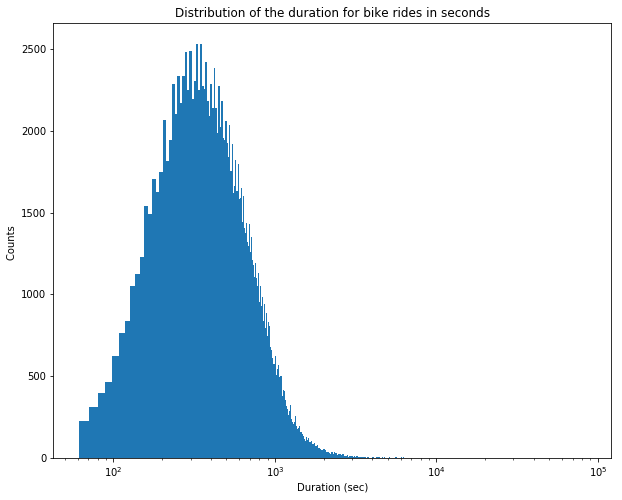

In [50]:
#what is the bike ride duration data distribution?

# in seconds
base_color=sb.color_palette()[0]
fig=plt.figure(figsize=[10,8])
fig.patch.set_facecolor('white')
plt.xscale('log')
plt.hist(data=df, x='duration_sec', bins=9000, color=base_color)
plt.legend()
plt.ylabel('Counts ')
plt.xlabel('Duration (sec)')
plt.title('Distribution of the duration for bike rides in seconds') 



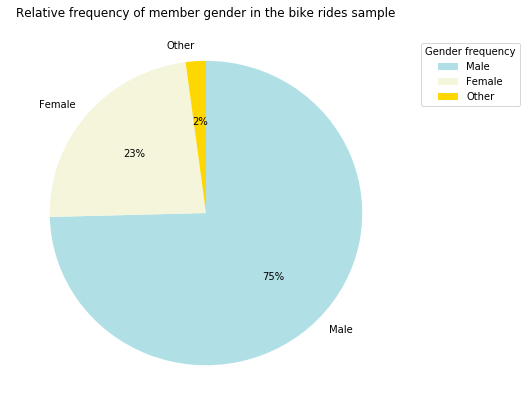

In [51]:
# Use a pie chart to visualize the relative frequency for the categorical variable member_gender
sorted_counts=df['member_gender'].value_counts()
sorted_counts
fig=plt.figure(figsize=[7,7])
fig.patch.set_facecolor('white')
plt.title("Relative frequency of member gender in the bike rides sample")
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, colors=['powderblue','beige','gold'],autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=2,title="Gender frequency")



> For the bike rides in the sample we observe that 75% were made by male member, 23% by females and others 2%.

In [52]:
df['member_birth_year'].value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
1992     8245
1987     8010
1986     7953
1994     7654
1995     7420
1985     7023
1984     6557
1983     5953
1980     5011
1982     4987
1996     4637
1981     4344
1979     3756
1997     3476
1998     3208
1978     2830
1977     2706
1974     2633
1999     2504
1975     2503
1976     2435
1973     2080
1968     1927
1971     1924
1972     1909
        ...  
1954      301
1952      189
1951      180
1950      178
1953      158
1947      135
1955      134
1945      105
1949       99
1931       89
1900       53
1948       51
2001       34
1943       30
1942       21
1933       20
1946       19
1939       11
1902       11
1941        9
1901        6
1938        3
1920        3
1934        2
1944        2
1878        1
1930        1
1928        1
1927        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]), <a list of 75 Text xticklabel objects>)

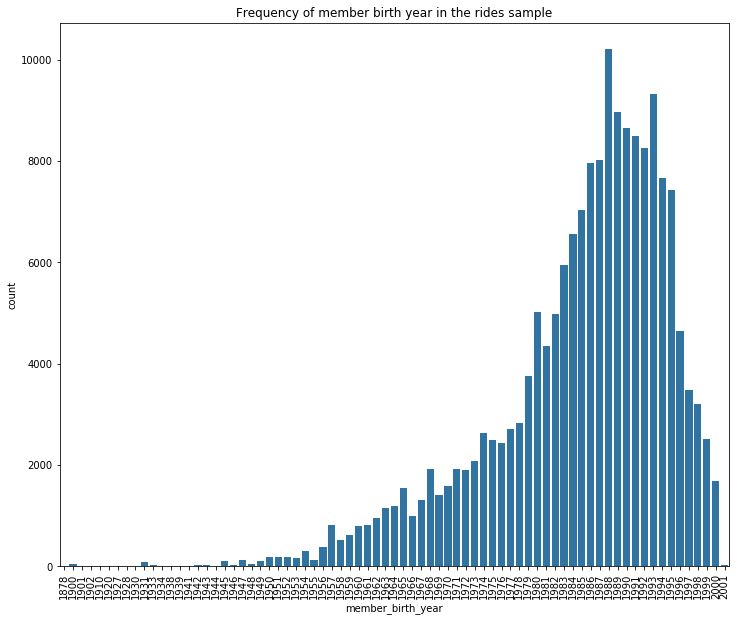

In [53]:
#Let's see now how what the age range by the birth year frequency 
base_color=sb.color_palette()[0]
fig=plt.figure(figsize=[12,10])
fig.patch.set_facecolor('white')
sb.countplot(data=df, x='member_birth_year', color=base_color).set(title="Frequency of member birth year in the rides sample")
plt.xticks(rotation=90)


> Seems highly unlikely that someone from 1878 is a user of this bike sharing system in 2019!!!I've considered users under 1940 to be outliers given the study I want to perform, where I focus of trends.Therefore I'll clean this group of observations from the dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

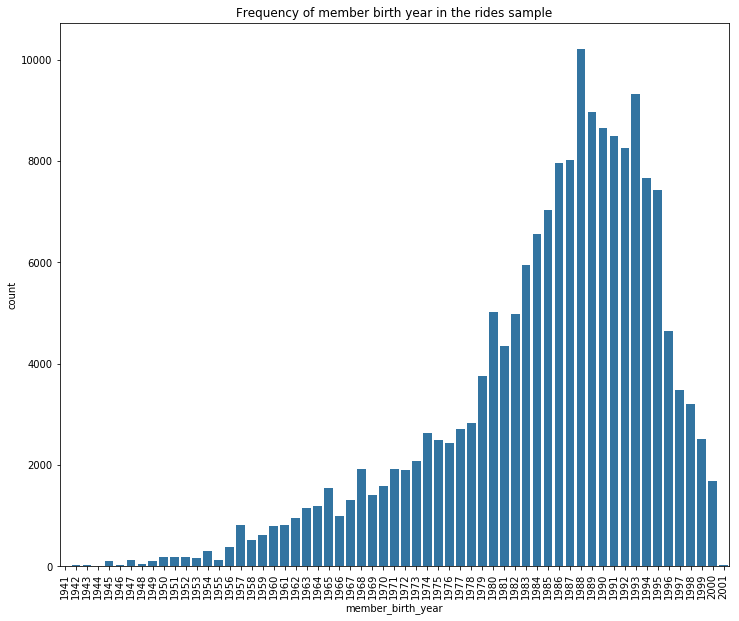

In [54]:
#Filtering the dataset to contain only the rides of members younger than 1950
df=df[df['member_birth_year']>1940]
fig=plt.figure(figsize=[12,10])
sb.countplot(data=df, x='member_birth_year', color=base_color).set(title="Frequency of member birth year in the rides sample")
plt.xticks(rotation=90)

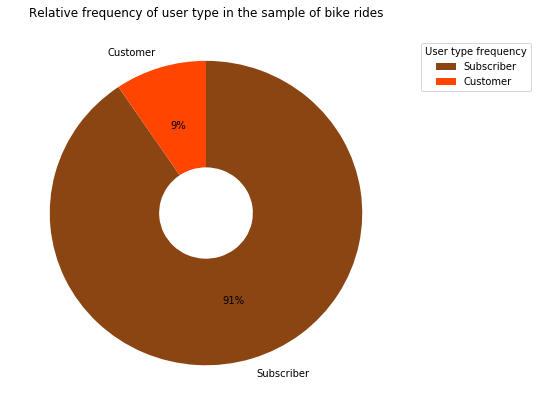

In [55]:
#let's see the user_types with a donut plot
#df['user_type'].value_counts()

sorted_counts=df['user_type'].value_counts()
sorted_counts
fig=plt.figure(figsize=[7,7])
fig.patch.set_facecolor('white')
plt.title("Relative frequency of user type in the sample of bike rides")
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, colors=['saddlebrown','orangered'],autopct='%1.0f%%', wedgeprops={'width':0.7})
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=2,title="User type frequency")



In [56]:
#Organize start and end date/time by month and determine what's the yearly overview

df['start_time'] = df['start_time'].astype('datetime64[ns]')



def get_year(Datetime):
    a = Datetime
    return a.year
   
df['year']=df['start_time'].apply(get_year)
def get_month(Datetime):
    a = Datetime
    return a.month
   
df['month']=df['start_time'].apply(get_month)

def get_day(Datetime):
    a = Datetime
    return a.day
   
df['day']=df['start_time'].apply(get_day)

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,year,month,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,2019,2,28
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,2019,2,28
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,2019,2,28
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,2019,2,28
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,2019,2,28


> Disappointingly the data refers to only to February of 2019, I was hoping to have an overview of the yearly usage, therefore I won't  continue in this direction.

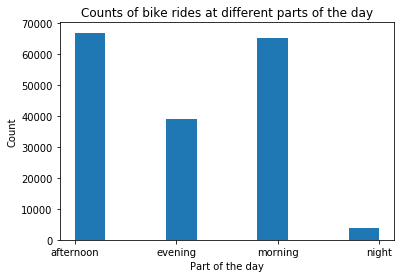

In [57]:
#Organize start datetime by morning and afternoon and determine what's the frequency of both

def get_part_of_the_day(Datetime):
    a = Datetime
    h = a.hour
    #print(h)
    return (
        "morning"
        if 5 <= h <= 11
        else "afternoon"
        if 12 <= h <= 17
        else "evening"
        if 18 <= h <= 22
        else "night"
    )    
df['day_part']=df['start_time'].apply(get_part_of_the_day)
df['day_part'].value_counts()
plt.hist(data=df, x='day_part', color=base_color)
plt.title('Counts of bike rides at different parts of the day')
plt.xlabel('Part of the day')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=2,title="Bike rides trough the day")

Text(0.5,0,'Start station id')

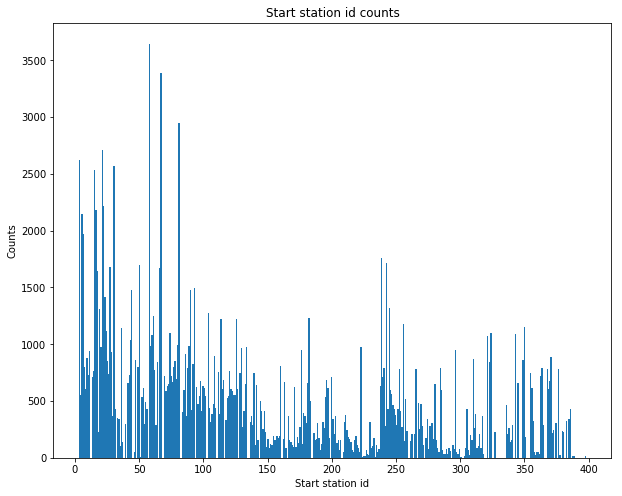

In [58]:
#What are the most popular start stations and end stations?
plt.figure(figsize=[10,8])
plt.hist(data=df, x='start_station_id',bins=398, color=base_color)
plt.title('Start station id counts')
plt.ylabel('Counts')
plt.xlabel('Start station id')

Text(0.5,1,'End station id counts')

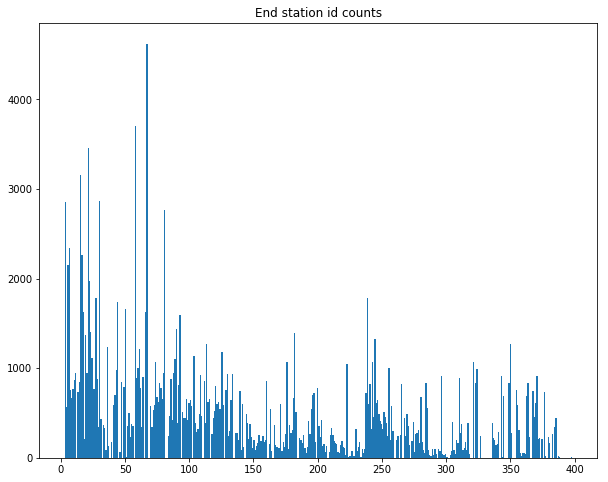

In [59]:
plt.figure(figsize=[10,8])
plt.hist(data=df, x='end_station_id',bins=398, color=base_color)
plt.title('End station id counts')

> From the distributions we can see some stations are significantly more popular as start station, just not sure if they are the same popular as end stations, but at first sight their are least nearby.Adding to the fact that the duration of bike ride has an average of 8 min, we  can hipothetize that the main usage is for short lenght transport rather than leisure.

Text(0.5,1,'Bike rides by day on February 2019')

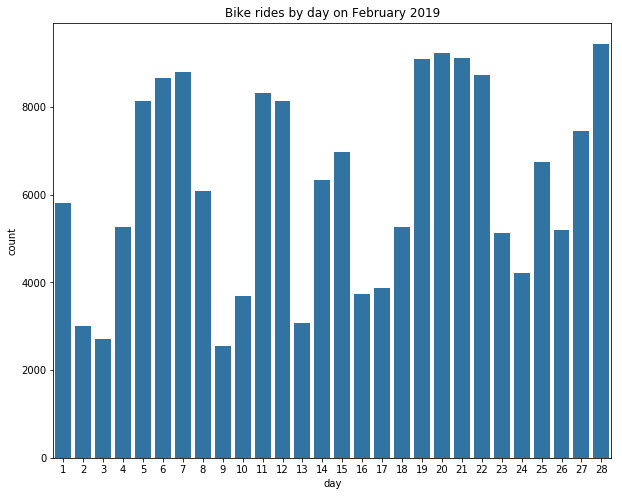

In [60]:
#which days were more popular in February 2019 our dataset time period?
plt.figure(figsize=[10,8])
sb.countplot(data=df, x='day', color=base_color)
plt.title('Bike rides by day on February 2019')

>The hipothese above is somehow corroborated here as weekdays show much higher usage of the bike sharing system than weekends(February, 2,3,9,10, 16,17,23,24...are weekends)

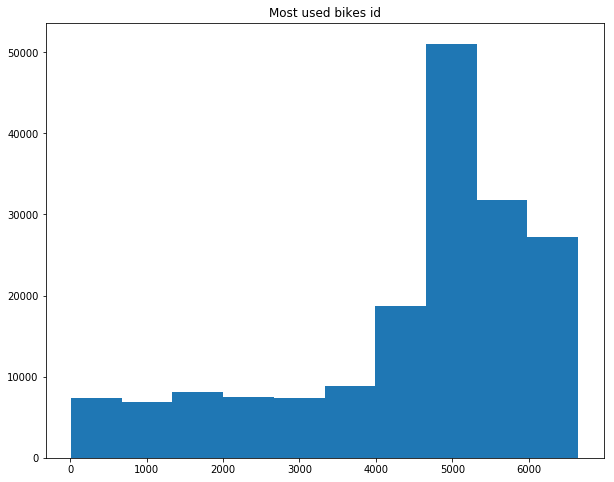

In [61]:
# bikes usage
plt.figure(figsize=[10,8])
plt.hist(data=df, x='bike_id')
plt.title("Most used bikes id")
plt.show()

> Most used bikes seem to have higher ids. Why? what kind of bikes are these? Maybe newer?

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After finding that the dataset refers to a very limited period February 2019, I dropped the idea of exploring the yearly trend of the GoBike sharing system.

>I got more interested in understanding the users and their habits, and from the exploration of duration of bike usage and stations_id along with the data on daily usage in that February, I can hypothesize that the main usage of the bikes is for short transportation probably to work in the city rather than leisure. And this is the direction that I intend to continue exploring with bivariate visualizations. 

>Unfortunatly the dataset doesn't include a member id, which could help to correctly observe the  proportions of user_type. >Though 91% the bike rides correspond to subscribers we have no data to support how large is this group, it's most probably a comparatevely small group of unique users repeatedly using the service on a daily basis for work.We can also ask who are the other 9% of costumers?

>Still with describing the target audience from the member birth year we can see that the bulk of usage belongs to people born between the 80 and 90s ranging the 30s to 40s.Also from the member gender we see that most usage is performed by males (75%) 

>I will not need the variables: longitude and latitude for this study which could maybe be interesting to estimate distances. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> With duration in seconds the distribution was right skewed with a long tail, therefore I've used a logaritmic transformation on the xscale. Manipulating Datetime of the ride start and end also led me to inquire about the day and part of the day  in search of evidences of a pattern of bike usage throughout the month and over the day.
> At the member_birth_year  1878 is most probably an error or evidence of a time travel outlier!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0,0.5,'Duration (sec) log-scale')

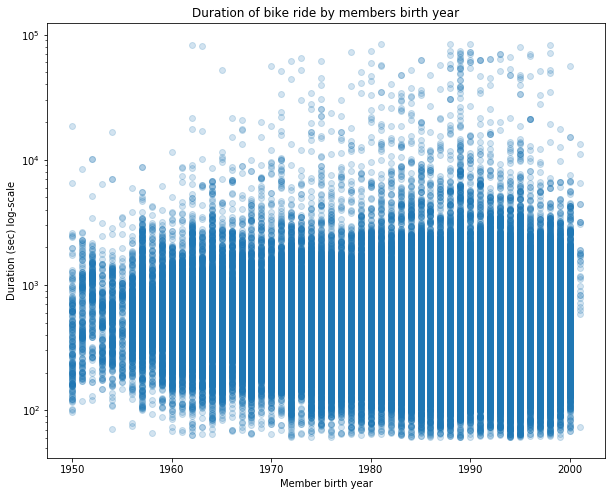

In [62]:
#See the relationship between birth year and duration of a bike ride
df2=df.query('member_birth_year>=1950')
plt.figure(figsize=[10,8])

plt.yscale('log')
plt.scatter(data=df2,x='member_birth_year', y='duration_sec', color=base_color,alpha=0.2)
plt.title('Duration of bike ride by members birth year')
plt.xlabel('Member birth year')
plt.ylabel('Duration (sec) log-scale')

> We can see that the bike rides duration tends to be between 100 and 1000 seconds predominantly for the group of people born since the sixties. Longer bike rides are less frequent as the transparency of the positions shows.

member_gender  Female    Male  Other
user_type                           
Customer         4621   11469    448
Subscriber      36112  118457   3171


Text(0.5,1,'Porportions between user_type and gender')

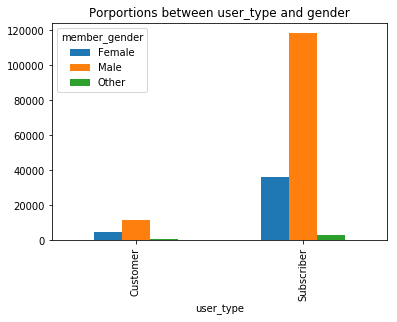

In [63]:
#Proportions between user_type and gender

CrosstabResult=pd.crosstab(index=df2['user_type'],columns=df['member_gender'])
print(CrosstabResult)

# Grouped bar chart between user_type and member_gender
plt.figure(figsize=[16,14]) 
CrosstabResult.plot.bar()
plt.title('Porportions between user_type and gender')

>Subscribers are by far the biggest users in the sample and among this the male are predominante

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Who are the users of the bike sharing system?
I have found out several interesting patterns in the sample used:

>Users are predominantly in the age range between 30s and 50s 

> Most bike rides are performed by are subscribers and from those most are male, less than half female and other have very small representation.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I focused on the relationships between member_gender, member age range, user_type, the station ids and the days and hours of day with more or less crowd.

## Multivariate Exploration

> This section plots the relationships between at least three or more variables.As I explore the habits of the users of this bike sharing system.


In [64]:
numeric_variables=['duration_sec','start_station_id','end_station_id', 'member_birth_year']
categoric_variables=['member_gender','user_type']

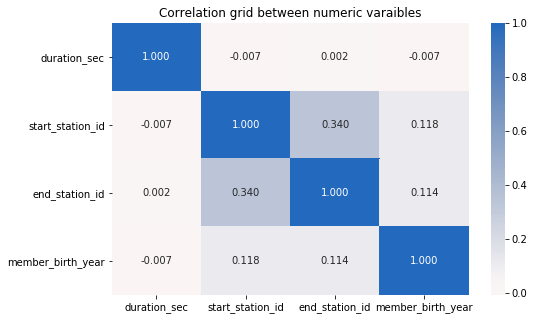

In [65]:
#Lets makes a correlation plot to check how numeric variables relate to each other
plt.figure(figsize=[8,5])
sb.heatmap(df[numeric_variables].corr(),annot=True,fmt='.3f',cmap='vlag_r', center=0)
plt.title("Correlation grid between numeric varaibles")
plt.show()

>The highest correlation is still very small and belongs to member_birth_year in relation to start_station_id and end_station_id

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<function matplotlib.pyplot.show(*args, **kw)>

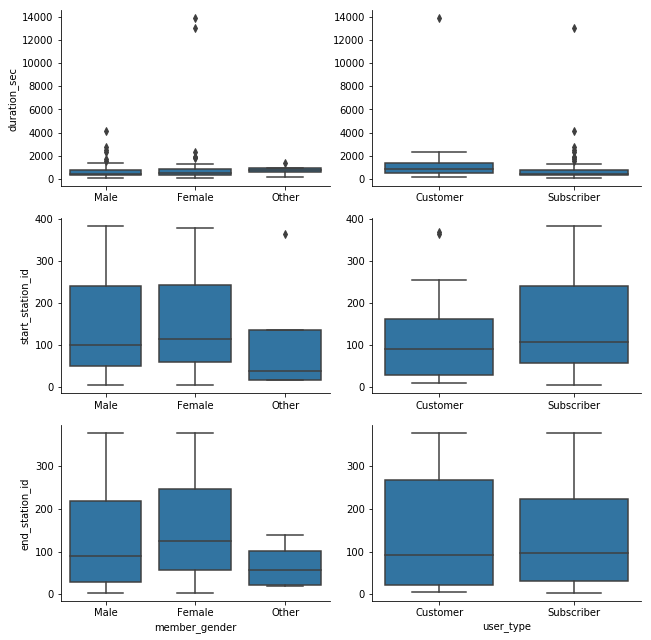

In [66]:
# using pairgrid with boxplots to check the relation between numeric and categoric variables
samples=np.random.choice(df.shape[0], 200, replace=False)
bike_rides_sample=df.loc[samples,:]

def boxgrid(x,y,** kwargs):
    default_color=sb.color_palette()[0]
    sb.boxplot(x,y, color=default_color)
    
    
plt.figure(figsize=[10,10])
g=sb.PairGrid(data=bike_rides_sample,y_vars=['duration_sec','start_station_id', 'end_station_id'], x_vars=categoric_variables,size=3, aspect=1.5)
g.map(boxgrid)
plt.show

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


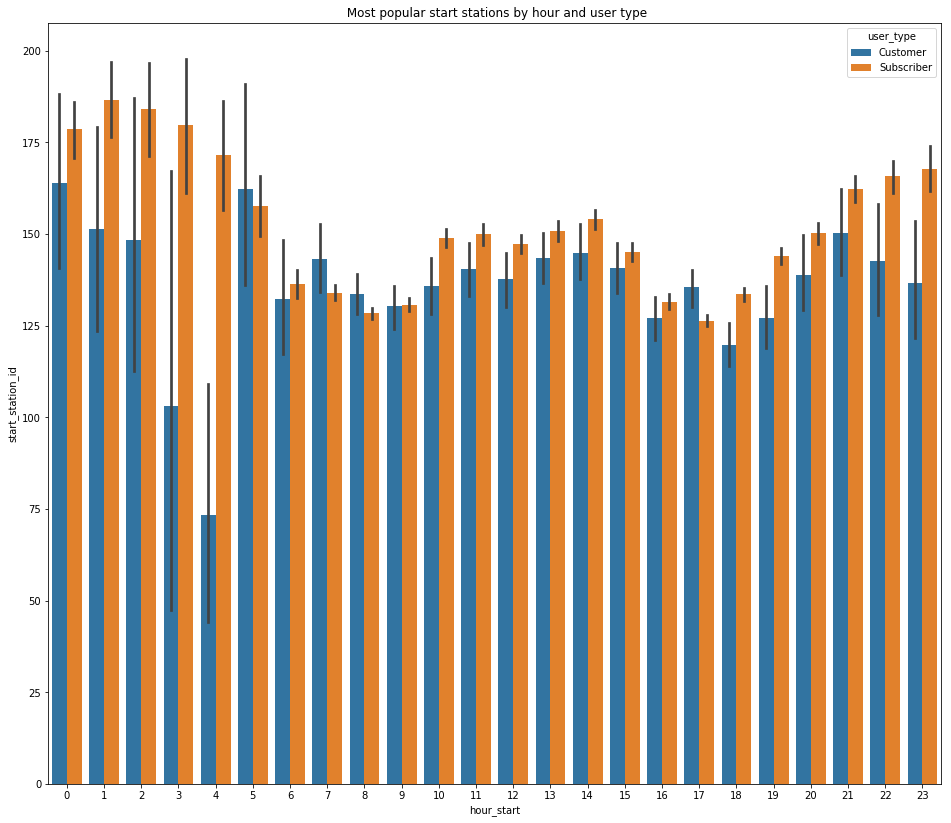

In [34]:
#Let's observe by hour the start stations in our sample
#In terms of user_type
# with a clustered barplot

def get_hour(Datetime):
    a = Datetime
    h = a.hour
    return h

df2['hour_start']=df2['start_time'].apply(get_hour)
df2['hour_start'].value_counts()

d=df2[df2['start_station_id']<80]

s=df2['start_station_id'].value_counts()
popular_s_station=s.nlargest(50)

plt.figure(figsize=[16,14])
sb.barplot(data=df2, x='hour_start', y='start_station_id', hue='user_type')
plt.title(" Most popular start stations by hour and user type")
plt.show()


> Not sure this chart is giving me what I wanted.I think it gives a estimate of the average station id by hour for each gender. The fact is maybe station ids can not be handled like this!!?

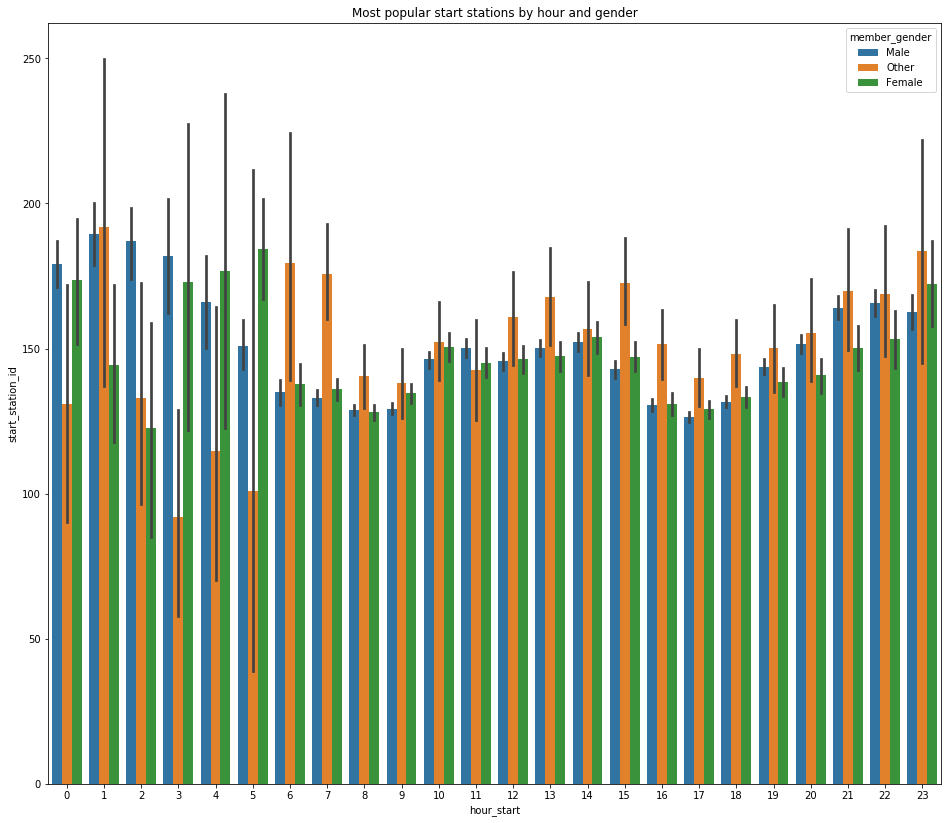

In [35]:
plt.figure(figsize=[16,14])
sb.barplot(data=df2, x='hour_start', y='start_station_id', hue='member_gender')
plt.title("Most popular start stations by hour and gender")
plt.show()

In [36]:
# Curious about the distribution by weekday
def get_weekday(Datetime):
    a = Datetime
    d = a.weekday()
    day='Friday'
    if d==0:
        day='Monday'
    elif d==1:
        day='Tuesday'
    elif d==2:
        day='Wednesday'
    elif d==3:
        day='Thursday'
    elif d==4:
        day=='Friday'
    elif d==5:
        day='Saturday'
    else:
        day='Sunday'
    return day
d['weekday']=d['start_time'].apply(get_weekday)
d['weekday'].value_counts()



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Thursday     14135
Tuesday      12769
Wednesday    11954
Friday       11558
Monday       10331
Saturday      4629
Sunday        4555
Name: weekday, dtype: int64

In [37]:
#sort the weekdays to plot then in order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
d['weekday'] = pd.Categorical(d['weekday'], categories=days, ordered=True)
d = d.sort_values('weekday')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


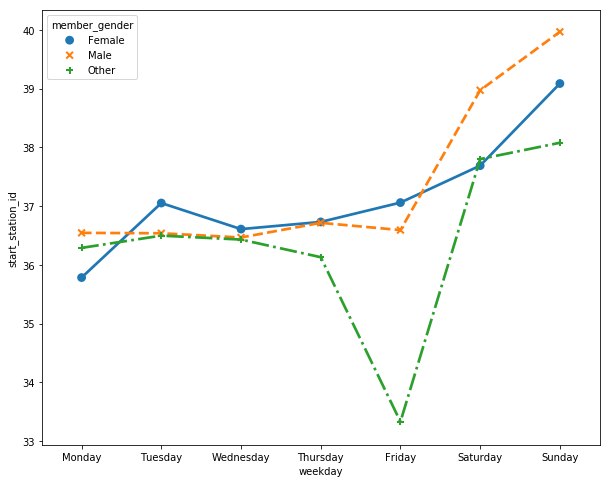

In [38]:
#Exploring the tendency in terms of start_stations by weekday for the different genders
plt.figure(figsize=[10,8])
sb.pointplot(data=d, x='weekday', y='start_station_id', hue='member_gender',ci=None, markers=["o", "x","+"],
                   linestyles=["-", "--","-."])

plt.show()

>This plot provides a central tendency for the start stations by weekday and gender, it gives the media of the position of scatter points.

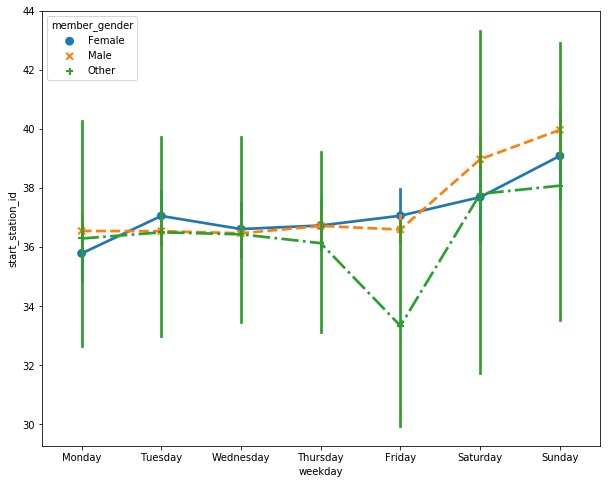

In [39]:
# Lets see what's the uncertainty associated with this plot line
plt.figure(figsize=[10,8])

sb.pointplot(data=d, x='weekday', y='start_station_id', hue='member_gender', alpha=0.02, markers=["o", "x","+"],
                   linestyles=["-", "--","-."])

plt.show()


> The error lines around the estimate points give an indication of the uncertainty.

> Again not sure about how correct is to use this type of plot with categoric and ordinal variables?!

In [46]:

df.to_csv("final-fordgobike-tripdata.csv",index=False)
df=pd.read_csv("final-fordgobike-tripdata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174749 entries, 0 to 174748
Data columns (total 15 columns):
duration_sec          174749 non-null int64
start_time            174749 non-null object
end_time              174749 non-null object
start_station_id      174749 non-null int64
start_station_name    174749 non-null object
end_station_id        174749 non-null int64
end_station_name      174749 non-null object
bike_id               174749 non-null int64
user_type             174749 non-null object
member_birth_year     174749 non-null int64
member_gender         174749 non-null object
year                  174749 non-null int64
month                 174749 non-null int64
day                   174749 non-null int64
day_part              174749 non-null object
dtypes: int64(8), object(7)
memory usage: 20.0+ MB


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>From study of a sample from our dataset I observed:

>Males usually use the bike sharing system for shorter rides(lowers than 100sec) but are also responsible for the longest bike trips outliers.

>Females and other gender usually take a bit longer rides than males but still around 1000sec(they are slower or do bigger distances).

>Looking in terms of user type subscribers do really short bike rides lower than 1000sec, while costumers do longer trips with Q3 above 1000sec.Costumers are also the responsible for the longest duration bike ride in the dataset, an outlier (turists?).

>Now observing the start_station_ids and end_station _ids relatively to gender and user type:
>Curiously males and females in average use the same start stations. Males use a wider range of start _station_ids compared to Females and other gender.

>Other gender tends to use more often different start stations than females and males,however the range is smaller and intersects naturally both male and female range.

>At the end_stations_id the sample indicates that females use a smaller range of end stations relatively to remaining genders. But in average all 3 groups show a slight difference in the average end_station_ids chosen. Wich is an interesting difference, if people use the bike system to go to work then it's normal that they tend to end the ride at same station daily and they work in different places. This average might represent the habits of the users in the sample rather than genders. Can we estimate unique users to be able to identify how representative are the groups by gender and user-type.


### Were there any interesting or surprising interactions between features?

> The multivariate plots were disappointing except for the boxplot which was useful and very insightful!

## Conclusions

From the dataset explored I observe that:

>This bike sharing system is used for short rides 

>Most bikes rides are done by subscribers 91%

>Males did 75% of those rides while females did 25% and other gender 2%

> Most trips are performed by users in the age range of 30s to 50s(1980-2000)

>Throught the day most rides happen in the morning and afternoon some in the evening and little at night

>Most popular stations have ids between 50 and 100

> Most popular days in February 2019 were workdays namely: 5,6,7, 11,12,19,20,21,22,28! Weekends are less popular!

> Somehow users tend to take more frequently bikes with a higher id!! Newer??

>Hipothesis: The bike sharing system is used mostly for transport to and from work for short distances!!

